In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels as st

In [20]:
dd=pd.read_csv(r'F:\VIRU\New folder\Luxembourg.csv')

In [21]:
dd.head()

,months,sales
0,2014-01,1
1,2014-02,0
2,2014-03,2
3,2014-04,2
4,2014-05,2


In [22]:
dd.tail()

,months,sales
79,2020-08,48
80,2020-09,106
81,2020-10,16
82,2020-11,43
83,2020-12,101


In [23]:
dd['months']=pd.to_datetime(dd['months'])

In [24]:
dd.set_index('months',inplace=True)

<AxesSubplot:xlabel='months'>

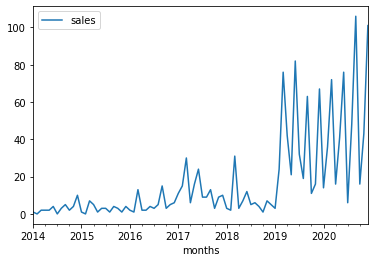

In [25]:
dd.plot()

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
dfuler = adfuller(dd['sales'])

In [28]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(0.20552432388541286,
 0.9725697399001971,
 12,
 71,
 {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957},
 556.9856546296609)

In [29]:
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


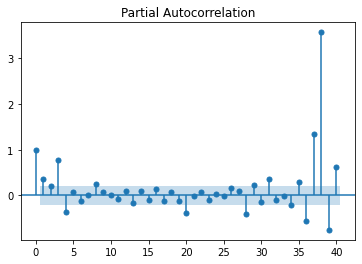

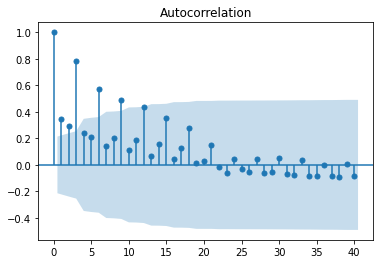

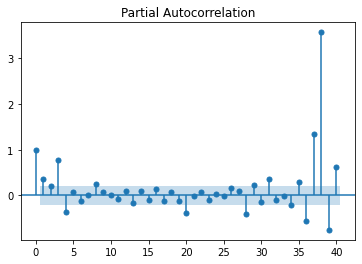

In [31]:
plot_acf(dd['sales'],lags=40)
plot_pacf(dd['sales'],lags=40)

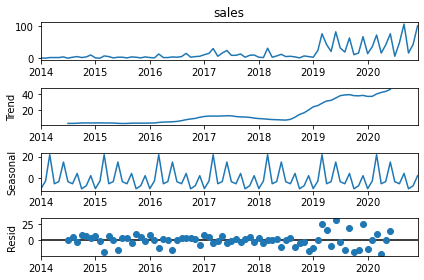

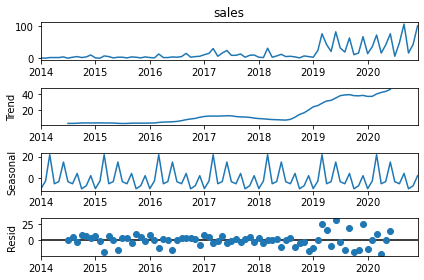

In [32]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [33]:
import statsmodels.api as sm

In [52]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(9,0,0),seasonal_order=(2,0,0,12))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting paramete

In [53]:
dd['forecast']=results.predict(start=73,end=83,dynamic=True)

<AxesSubplot:xlabel='months'>

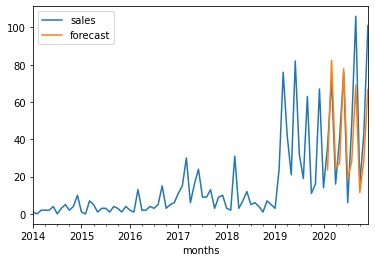

In [54]:
dd[['sales','forecast']].plot()

In [55]:
output=results.forecast(24)

In [56]:
output

2021-01-01    20.943436
2021-02-01    48.294473
2021-03-01    89.698241
2021-04-01    16.174545
2021-05-01    51.910683
2021-06-01    86.042965
2021-07-01    11.026696
2021-08-01    54.982410
2021-09-01    88.985926
2021-10-01    13.237593
2021-11-01    54.916035
2021-12-01    83.261057
2022-01-01    14.441819
2022-02-01    57.600809
2022-03-01    75.922905
2022-04-01    12.951822
2022-05-01    58.960591
2022-06-01    70.978715
2022-07-01    11.510987
2022-08-01    60.038030
2022-09-01    68.834946
2022-10-01    12.842174
2022-11-01    59.753855
2022-12-01    63.558215
Freq: MS, Name: predicted_mean, dtype: float64

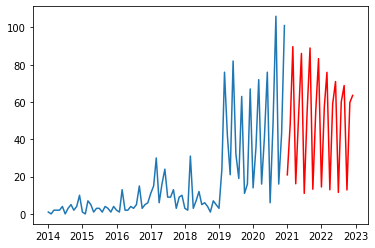

In [57]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='red')

In [58]:
from pandas.tseries.offsets import DateOffset

In [62]:
future_dates=[dd.index[-1]+DateOffset(months=x) for x in range(0,25)]

In [63]:
future_dates_dd = pd.DataFrame(index=future_dates[1:],columns=dd.columns)

In [64]:
future_dates_dd.tail()

,sales,forecast
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN
2022-11-01,NaN,NaN
2022-12-01,NaN,NaN


In [65]:
future_dd=pd.concat([dd,future_dates_dd])

In [66]:
future_dd['forecast']=results.predict(start=83,end=107,dynamic=True)

<AxesSubplot:>

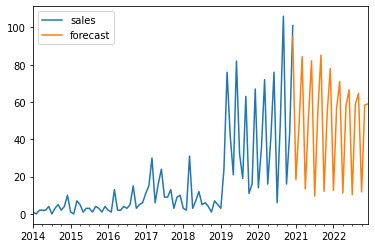

In [67]:
future_dd[['sales','forecast']].plot()